<a href="https://colab.research.google.com/github/SachinGuria47/Analyzing-Price-Trends-and-Inflation-Patterns-in-India-s-Consumer-Price-Index--Rural-and-Urban--up-t/blob/main/Prediction_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_cpi.csv')
df.info(),df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sector                               393 non-null    object 
 1   Year                                 393 non-null    int64  
 2   Month                                393 non-null    object 
 3   Cereals and products                 393 non-null    float64
 4   Meat and fish                        393 non-null    float64
 5   Egg                                  393 non-null    float64
 6   Milk and products                    393 non-null    float64
 7   Oils and fats                        393 non-null    float64
 8   Fruits                               393 non-null    float64
 9   Vegetables                           393 non-null    float64
 10  Pulses and products                  393 non-null    float64
 11  Sugar and Confectionery         

(None,
   Sector  Year    Month  Cereals and products  Meat and fish    Egg  \
 0  Rural  2013  January                 107.5          106.3  108.1   
 1  Urban  2013  January                 110.5          109.1  113.0   
 
    Milk and products  Oils and fats  Fruits  Vegetables  ...  Housing  \
 0              104.9          106.1   103.9       101.9  ...    141.7   
 1              103.6          103.4   102.3       102.9  ...    100.3   
 
    Fuel and light  Household goods and services  Health  \
 0           105.5                         104.8   104.0   
 1           105.4                         104.8   104.1   
 
    Transport and communication  Recreation and amusement  Education  \
 0                        103.3                     103.4      103.8   
 1                        103.2                     102.9      103.5   
 
    Personal care and effects  Miscellaneous  General index  
 0                      104.7          104.0          105.1  
 1                      104

## Calculating the price index wheather it has increased(1) or decreased(0) over the past months.

In [4]:
df['price_index'] = (df['General index'] > df['General index'].shift(1)).astype(int)
df.head(2)  # price_index  will be the target value
#  used General index because it is the overall calculated CPI(Consumer Price Index) value of all the features or categories present in the dataset

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index,price_index
0,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,101.9,...,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1,0
1,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,102.9,...,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0,0


## selecting relevent features to act as a input variables and target variable

In [9]:
input_var = df.drop(['price_index','General index','Year','Month','Sector'],axis=1) # removing non-numeric values and General index as it used to create the target value as to prevent data leakage
target = df['price_index']

In [73]:
# total counts of price_index increased and decreased in this present dataset
total_inc = (df['price_index'] == 1).sum()
total_dec = (df['price_index'] == 0).sum()

print(f'increased count = {total_inc}')
print(f'decreased count = {total_dec}')

increased count = 256
decreased count = 137


## correlation heatmap to identify correlated features

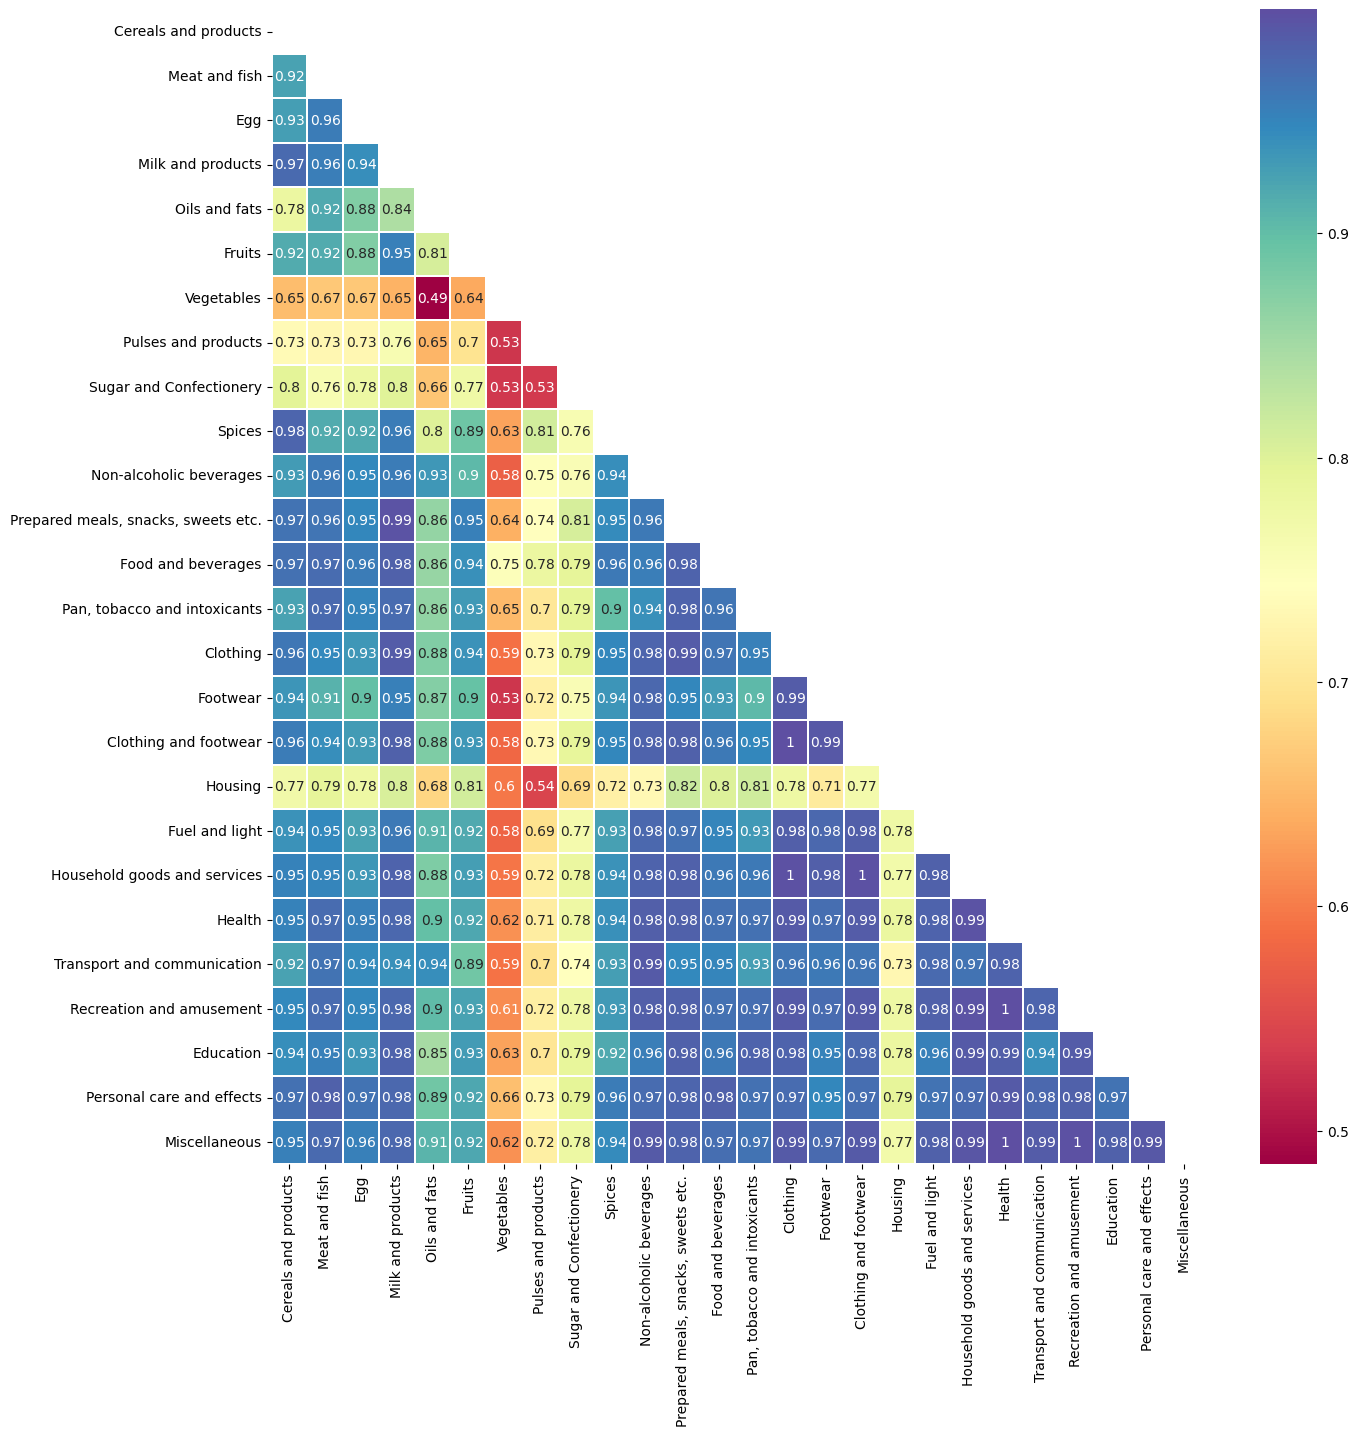

In [54]:
plt.figure(figsize=(15,15))
correlation = input_var.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation,mask=mask,annot=True,cmap='Spectral',linewidth=0.1)
plt.show()

## feature scaling using standardization

In [55]:
scaler = StandardScaler()
input_var_scaled = scaler.fit_transform(input_var)

##applying PCA for dimensionality reduction

In [66]:
pca = PCA(n_components=0.95)
input_var_pca = pca.fit_transform(input_var_scaled)

variance = pca.explained_variance_ratio_
print(variance)

[0.89417945 0.02910579 0.02129409 0.01519325]


##  Logistic Regression model

In [70]:
# spliting the pca reduced data to training and test sets
x_train,x_test,y_train,y_test = train_test_split(input_var_pca,target,test_size=0.2,random_state=42)

# model training
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train,y_train)

#predictions
y_pred = log_reg.predict(x_test)

# model evaluation
accuracy = accuracy_score(y_test,y_pred)
confusion_m = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)

print(f'accuracy = {accuracy}')
print(f'confusion matrix = \n{confusion_m}')
print(f'classification report =\n {class_report}')

accuracy = 0.7468354430379747
confusion matrix = 
[[14 13]
 [ 7 45]]
classification report =
               precision    recall  f1-score   support

           0       0.67      0.52      0.58        27
           1       0.78      0.87      0.82        52

    accuracy                           0.75        79
   macro avg       0.72      0.69      0.70        79
weighted avg       0.74      0.75      0.74        79

